In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
bbc_data = pd.read_csv("./datasets/BBC News Train.csv")
ml_data = pd.read_csv("./datasets/money_laundering_articles.csv")

In [11]:
bbc_data.sample(5)

,ArticleId,Text,Category
561,293,christmas song formula unveiled a formula for...,entertainment
1397,1937,more power to the people says hp the digital r...,tech
366,400,lib dems bold election policy charles kenne...,politics
298,25,mobile audio enters new dimension as mobile ph...,tech
951,156,the comic book genius of stan lee stan lee th...,entertainment


In [13]:
ml_data.sample(5)

,title,text,source_url,money_laundering,allegations,accusations,charges_conviction,sentencing
0,Witness details alleged money laundering consp...,"When he was running for mayor in 2016, then-No...",https://www.pilotonline.com/news/crime/vp-nw-m...,1,1,0,0,0
1,Court summons Gayatri Prajapati in money laund...,\nED has been probing the former legislator on...,https://www.thehindu.com/news/national/other-s...,1,1,0,0,0
2,ED issues lookout notice against Anil Deshmukh...,\n\nThe Enforcement Directorate has issued a l...,https://scroll.in/latest/1004661/ed-issues-loo...,1,1,0,0,0
3,Vienna’s banking industry struggles to shake o...,\n\tPlease use the sharing tools found via the...,https://www.ft.com/content/cca24b53-379b-4553-...,1,1,0,0,0
4,Defense lawyers say 1st Amendment protected ad...,Lawyers defending the founders of the classifi...,https://www.local10.com/news/politics/2021/09/...,1,1,0,0,0


In [14]:
bbc_data['news_length'] = bbc_data['Text'].str.len()

Text(0.5, 1.0, 'Distribution of Article Lengths')

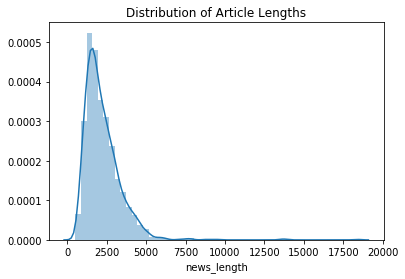

In [16]:
sns.distplot(bbc_data['news_length']).set_title('Distribution of Article Lengths')

Text(0.5, 1.0, 'Distribution of Article Lengths')

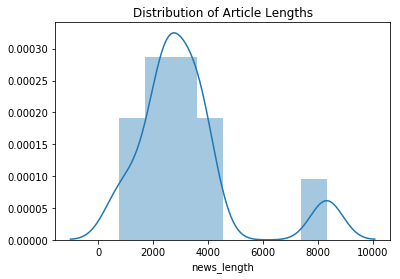

In [17]:
ml_data['news_length'] = ml_data['text'].str.len()
sns.distplot(ml_data['news_length']).set_title('Distribution of Article Lengths')

In [23]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [24]:
ml_data['text_parsed'] = ml_data['text'].apply(process_text)

In [25]:
ml_data[['text', 'text_parsed']].head()

,text,text_parsed
0,"When he was running for mayor in 2016, then-No...",running mayor 2016 thennorfolk sheriff bob mcc...
1,\nED has been probing the former legislator on...,ed probing former legislator money laundering ...
2,\n\nThe Enforcement Directorate has issued a l...,enforcement directorate issued lookout notice ...
3,\n\tPlease use the sharing tools found via the...,please use sharing tools found via share butto...
4,Lawyers defending the founders of the classifi...,lawyers defending founders classified site bac...


In [27]:
ml_data.to_csv('./datasets/money_laundering_news_processed.csv')

In [18]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [ ]:
# subset=data[data.Category=="entertainment"]
# text=subset.Text.values
# words =" ".join(text)
# create_wordcloud(words)